<a href="https://colab.research.google.com/github/saransh2396/Cardiovascular-Risk-Prediction/blob/main/Dec_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting drive to load data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

In [ ]:
#Loading the data
df = pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction - Saransh Srivastava/data_cardiovascular_risk.csv',encoding= 'unicode_escape')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.shape

(3390, 17)

# Handling null values


In [ ]:
(df.isnull().sum()/len(df))*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

Filling the rows which has higher than 5% null and lower than 30% null values

In [ ]:
df['glucose'].fillna(value=df['glucose'].mode()[0],inplace=True)

Dropping the rows which has lower than 5% null values 

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
(df.isnull().sum()/len(df))*100

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3189 non-null   int64  
 1   age              3189 non-null   int64  
 2   education        3189 non-null   float64
 3   sex              3189 non-null   object 
 4   is_smoking       3189 non-null   object 
 5   cigsPerDay       3189 non-null   float64
 6   BPMeds           3189 non-null   float64
 7   prevalentStroke  3189 non-null   int64  
 8   prevalentHyp     3189 non-null   int64  
 9   diabetes         3189 non-null   int64  
 10  totChol          3189 non-null   float64
 11  sysBP            3189 non-null   float64
 12  diaBP            3189 non-null   float64
 13  BMI              3189 non-null   float64
 14  heartRate        3189 non-null   float64
 15  glucose          3189 non-null   float64
 16  TenYearCHD       3189 non-null   int64  
dtypes: float64(9),

In [ ]:
#Dropping id column
df.drop(['id'],axis=1,inplace=True)

In [ ]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000
mean,49.423957,1.972719,9.098150,0.029476,0.005958,0.313264,0.025400,236.968642,132.436344,82.841173,25.774569,76.034180,81.364691,0.148950
std,8.556235,1.018435,11.864621,0.169164,0.076970,0.463894,0.157361,44.537998,22.176848,11.993650,4.132848,12.056788,23.173510,0.356095
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,22.940000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.370000,75.000000,77.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.500000,27.990000,83.000000,85.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.shape

(3189, 16)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [ ]:
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


###Target Variable

In [ ]:
df['TenYearCHD'].value_counts()

0    2714
1     475
Name: TenYearCHD, dtype: int64

TenYearCHD is the target variable

# EDA

In [ ]:
#Storing all the features which has continuous values
continuous_variables = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [ ]:
other_variables = ['education','sex','is_smoking','prevalentStroke','prevalentHyp','diabetes']

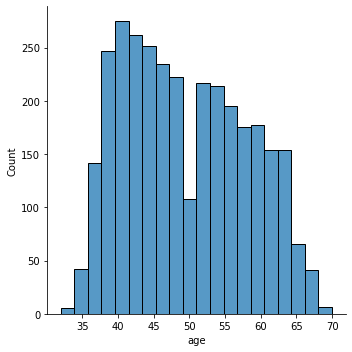

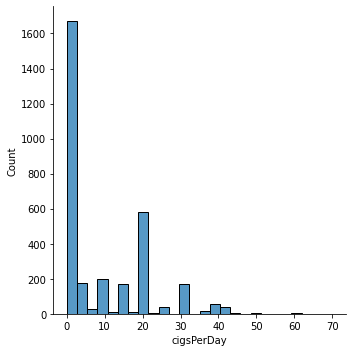

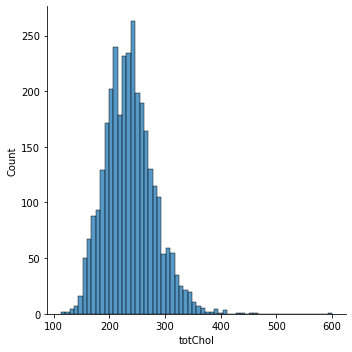

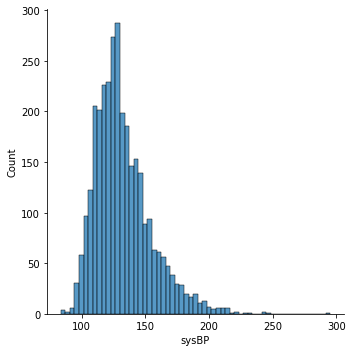

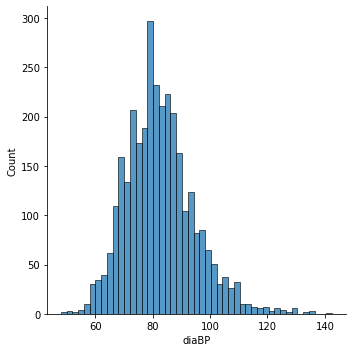

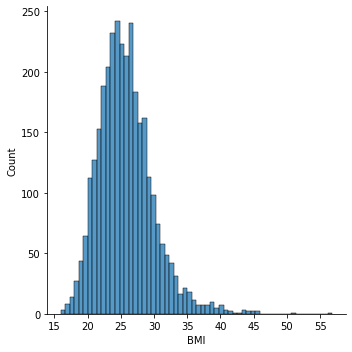

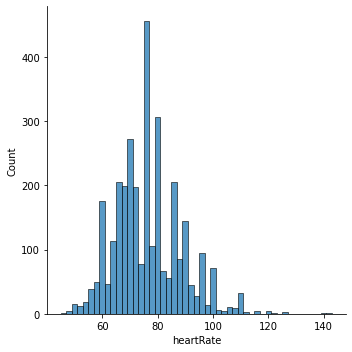

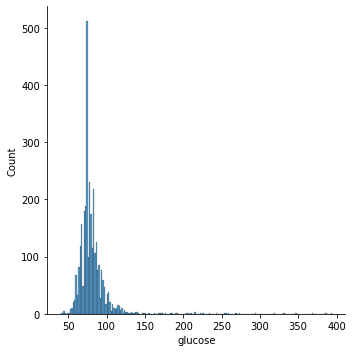

In [ ]:
#Analyzing the distribution of all the features which has continuous values
for col in continuous_variables:
  sns.displot(df[col])
plt.show()

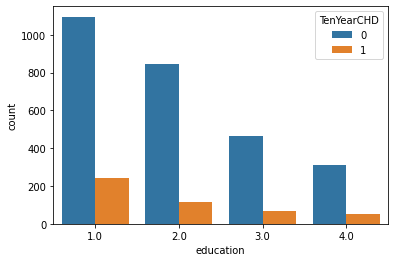

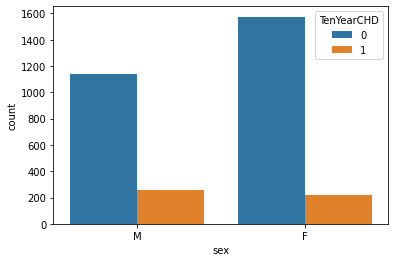

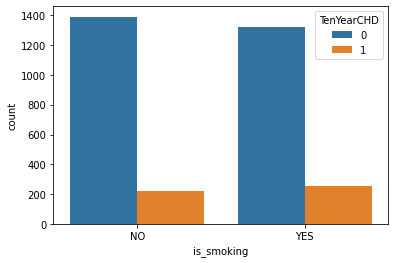

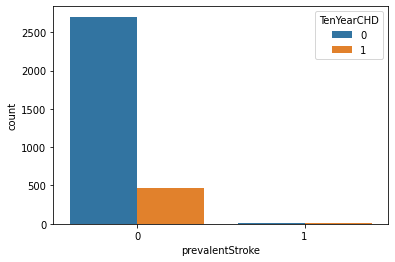

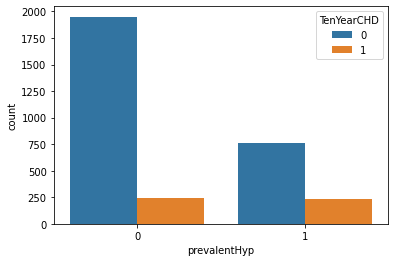

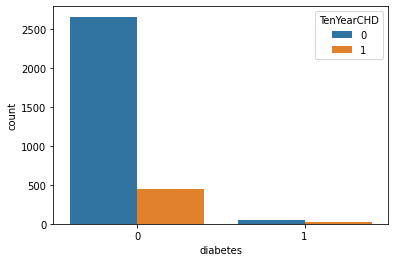

In [ ]:
#Counting all the encoded values where dependent variable is the parameter
for col in other_variables:
  sns.countplot(x=df[col],hue=df['TenYearCHD'],data=df)
  plt.show()

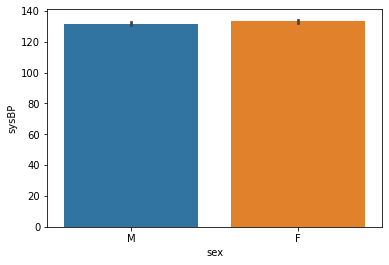

In [ ]:
#sysBP varying amomng the genders
sns.barplot(x=df['sex'],y=df['sysBP'],data=df)

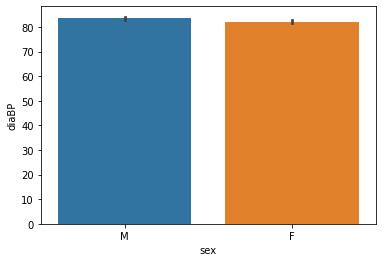

In [ ]:
#diaBP varying among the genders
sns.barplot(x=df['sex'],y=df['diaBP'],data=df)

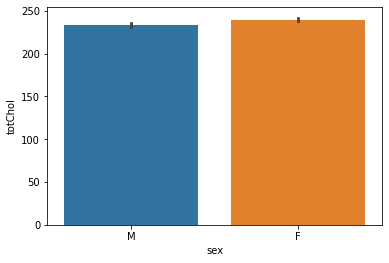

In [ ]:
#total Cholestrol varying among the genders
sns.barplot(x=df['sex'],y=df['totChol'],data=df)

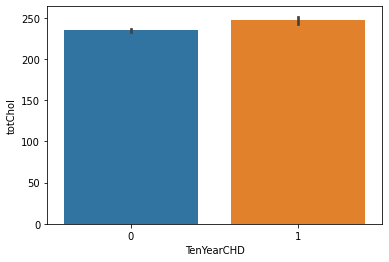

In [ ]:
#total cholestrol of a person who is at risk and who isn't
sns.barplot(x=df['TenYearCHD'],y=df['totChol'],data=df)

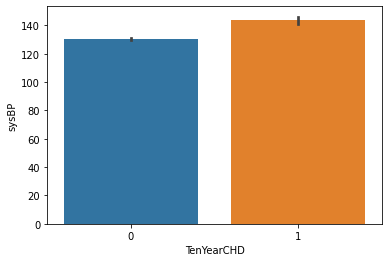

In [ ]:
#sysBP of a person who is at risk and who isn't
sns.barplot(x=df['TenYearCHD'],y=df['sysBP'],data=df)

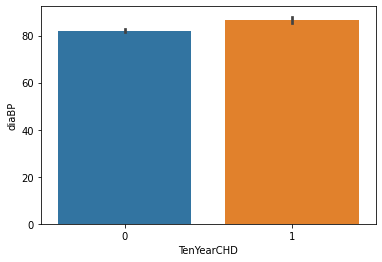

In [ ]:
#diaBP of a person who is at risk and who isn't
sns.barplot(x=df['TenYearCHD'],y=df['diaBP'],data=df)

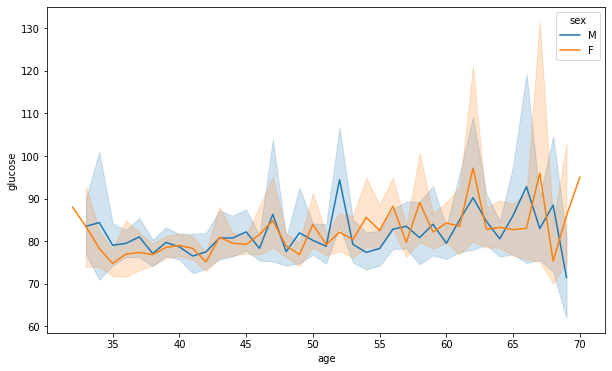

In [ ]:
#Finding When a person gets old how much their glucose level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['glucose'],hue=df['sex'],data=df)

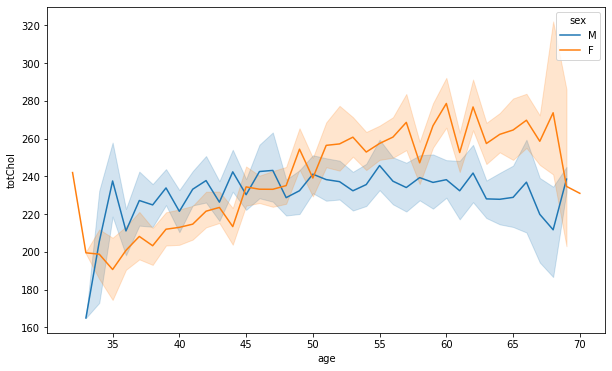

In [ ]:
#Finding when a person gets old how much Cholestrol level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['totChol'],hue=df['sex'],data=df)

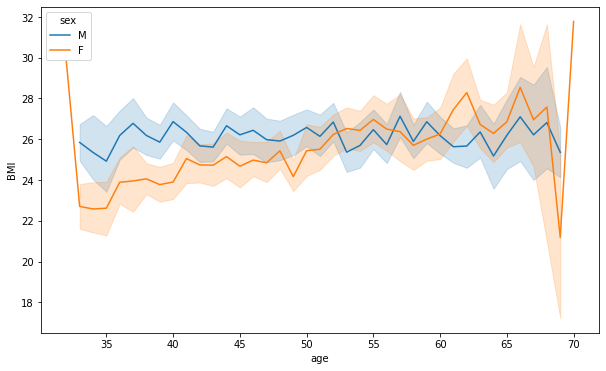

In [ ]:
#Finding when a person gets old how much their BMI level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['BMI'],hue=df['sex'],data=df)

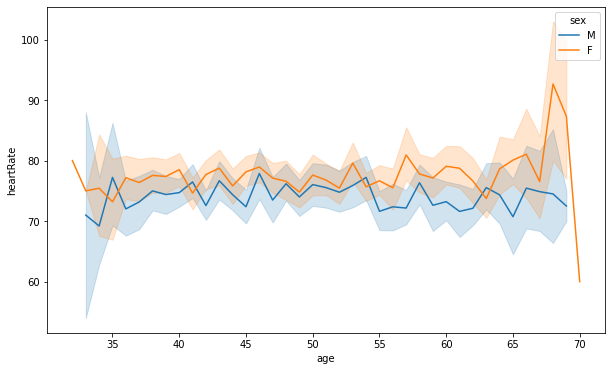

In [ ]:
#Finding when a person gets old how much their heart rate level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['heartRate'],hue=df['sex'],data=df)

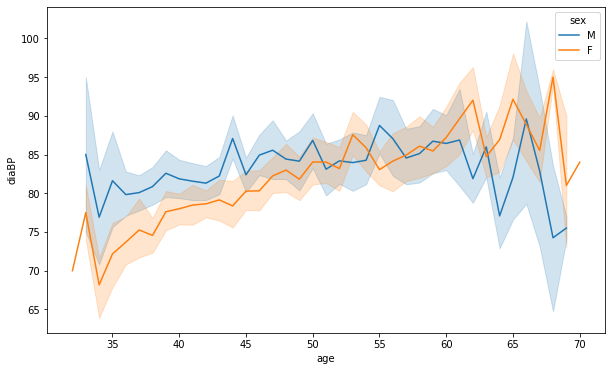

In [ ]:
#Finding when a person gets old how much their diaBP level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['diaBP'],hue=df['sex'],data=df)

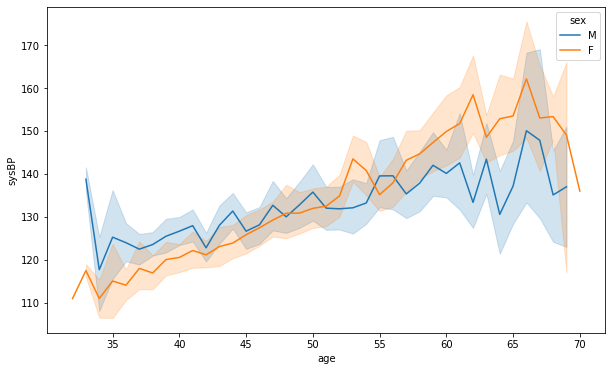

In [ ]:
#Finding when a person gets old how much their sysBP level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['sysBP'],hue=df['sex'],data=df)

# Handling Outliers

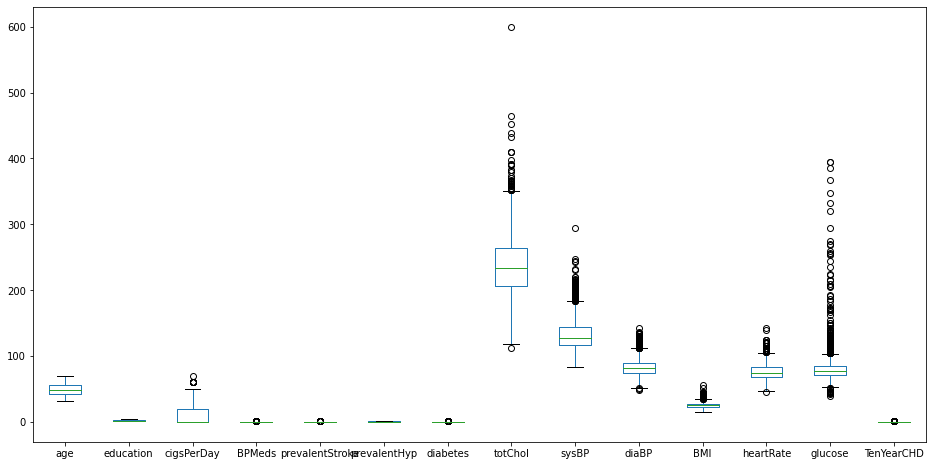

In [ ]:
#Box Plot for analyzing the outliers
df.plot(kind='box',figsize=(16,8))

In [ ]:
#Stored all the features where we want to remove outliers
outlier_col = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

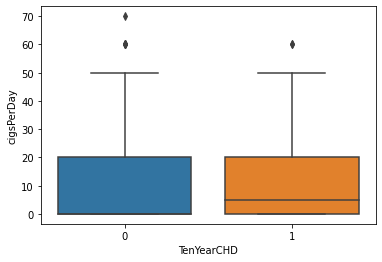

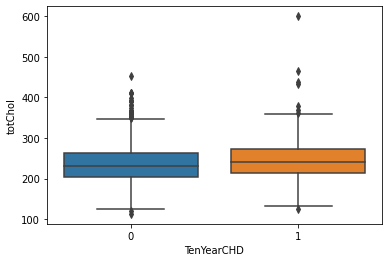

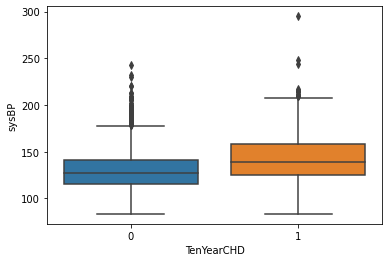

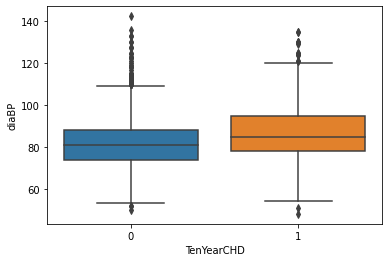

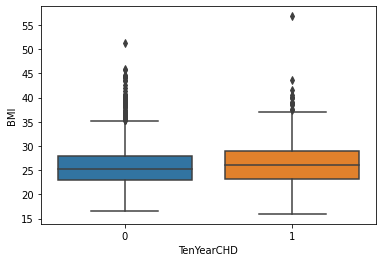

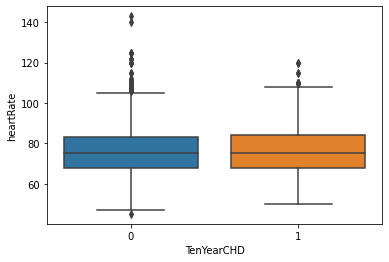

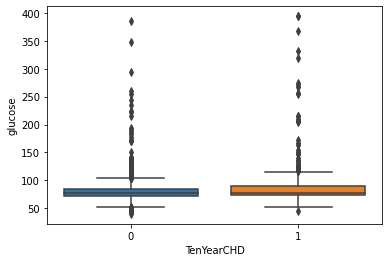

In [ ]:
#Analyzing the outlier columns
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

In [ ]:
#Handling Outliers
df[outlier_col]=df[outlier_col].clip(lower=df[outlier_col].quantile(0.15),upper=df[outlier_col].quantile(0.85),axis=1)

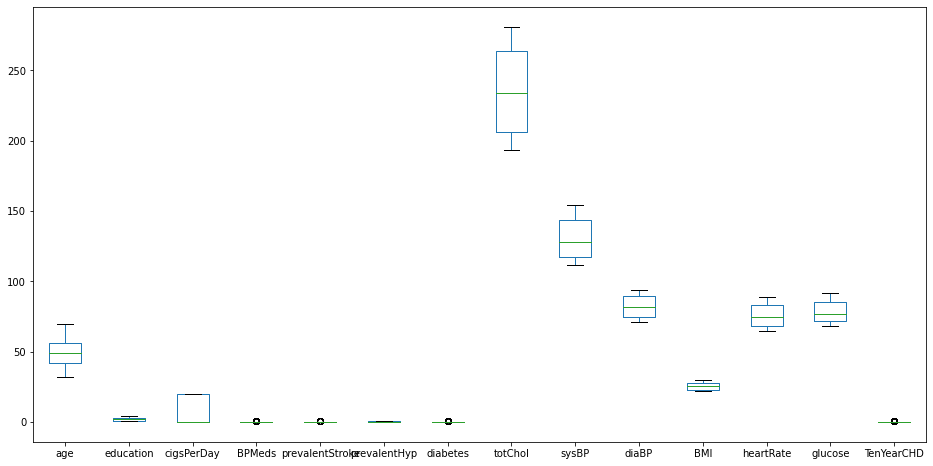

In [ ]:
#Box plot after handling outliers
df.plot(kind='box',figsize=(16,8))

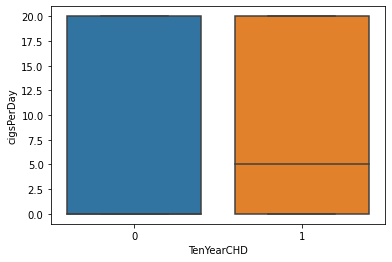

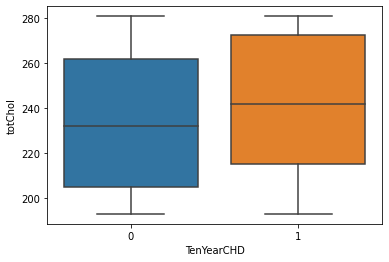

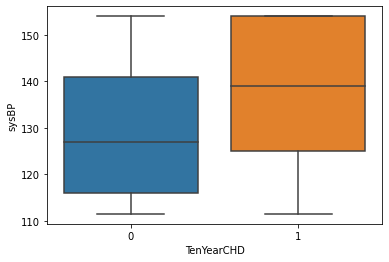

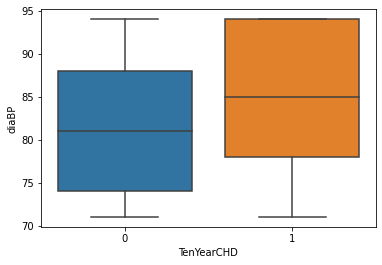

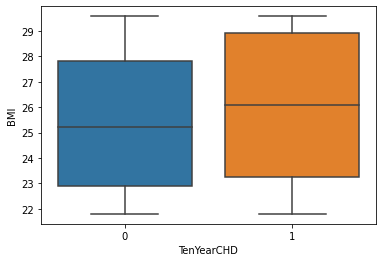

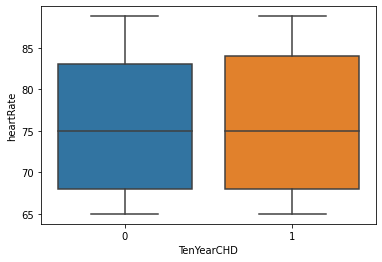

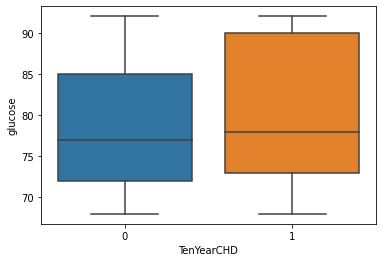

In [ ]:
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

# Multicollinearity

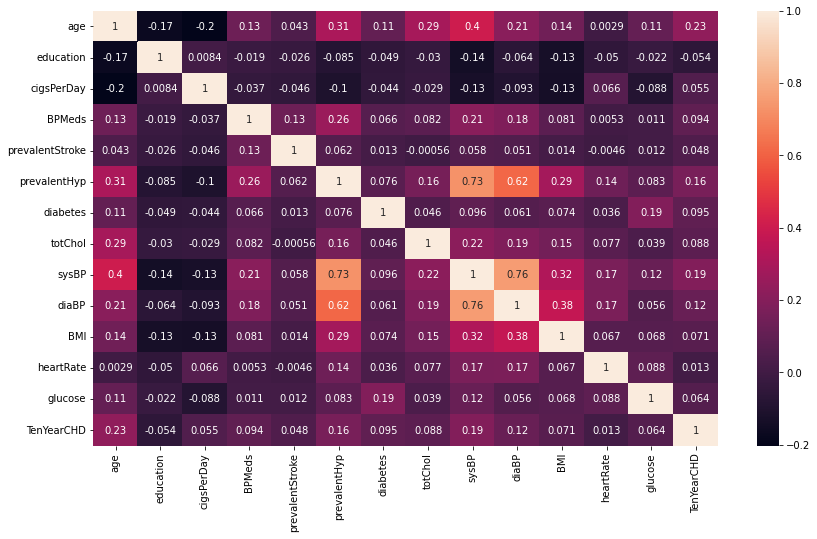

In [ ]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(df[[i for i in df.describe().columns ]])

,variables,VIF
0,age,47.044314
1,education,4.796363
2,cigsPerDay,1.839989
3,BPMeds,1.130465
4,prevalentStroke,1.028448
5,prevalentHyp,2.555430
6,diabetes,1.070168
7,totChol,62.811486
8,sysBP,265.055672
9,diaBP,250.502661


sysBp means systolic blood pressure and diaBP means diastolic blood pressure are correalted to eaach other but we cannot drop these columns as 
Blood pressure is measured using two numbers: The first number, called systolic blood pressure, measures the pressure in your arteries when your heart beats. The second number, called diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.

# Label Encoding

In [ ]:
#Mapping the Variables
df['is_smoking']=df['is_smoking'].map({'YES':1,'NO':0})
df['sex']=df['sex'].map({'M':0,'F':1})

In [ ]:
df.head(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,154.0,94.0,29.576,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,21.800,88.0,92.0,0


# Feature Selection

In [ ]:
X = df.iloc[:,0:-1].values
y=df['TenYearCHD'].values

In [ ]:
X

array([[36.   ,  4.   ,  0.   , ..., 29.576, 72.   , 75.   ],
       [46.   ,  1.   ,  1.   , ..., 21.8  , 88.   , 92.   ],
       [50.   ,  1.   ,  0.   , ..., 28.26 , 68.   , 92.   ],
       ...,
       [46.   ,  1.   ,  1.   , ..., 21.96 , 80.   , 84.   ],
       [44.   ,  3.   ,  0.   , ..., 28.92 , 73.   , 72.   ],
       [54.   ,  3.   ,  1.   , ..., 29.576, 79.   , 92.   ]])

In [ ]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
X.shape,y.shape

((3189, 15), (3189,))

# Splitting & Scaling data

In [ ]:
#Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 

In [ ]:
#Checking the shape of our training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2551, 15)
(638, 15)
(2551,)
(638,)


In [ ]:
#Using Standard Scaler to scale 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# Implementing Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()

In [ ]:
#Fitting the training datasets
Log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#predicting on training dataset
y_pred_log_train = Log.predict(X_train)

In [ ]:
#predicting on testing dataset
y_pred_log_test = Log.predict(X_test)

## Classification Evaluation Metrics on Logistic Regression.

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#Accuracy score of training
log_acc_train = accuracy_score(y_train,y_pred_log_train)*100
log_acc_train

85.57428459427675

In [ ]:
#Accuracy score of testing
log_acc_test = accuracy_score(y_test,y_pred_log_test)*100
log_acc_test

85.57993730407524

In [ ]:
#Confusion Metrics of training
cm_log_train = confusion_matrix(y_train,y_pred_log_train)
cm_log_train

array([[2166,   10],
       [ 358,   17]])

In [ ]:
#Confusion Metrics of testing
cm_log_test = confusion_matrix(y_test,y_pred_log_test)
cm_log_test

array([[534,   4],
       [ 88,  12]])

In [ ]:
#Classification Report of training
print(classification_report(y_train,y_pred_log_train))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2176
           1       0.63      0.05      0.08       375

    accuracy                           0.86      2551
   macro avg       0.74      0.52      0.50      2551
weighted avg       0.82      0.86      0.80      2551



In [ ]:
#Classification report of testing
print(classification_report(y_test,y_pred_log_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       538
           1       0.75      0.12      0.21       100

    accuracy                           0.86       638
   macro avg       0.80      0.56      0.56       638
weighted avg       0.84      0.86      0.81       638



AS our data is highly imbalance so we have to improve this

# Using Smotek Technique

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [ ]:
X_res.shape,y_res.shape,X.shape,y.shape

((5380, 15), (5380,), (3189, 15), (3189,))

##Splitting & scaling data after Smotek Technique

In [ ]:
#Splitting the data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.20, random_state=0)

In [ ]:
X_train_res.shape,y_train_res.shape

((4304, 15), (4304,))

In [ ]:
#Scaling the data
X_train_res = scaler.fit_transform(X_train_res)
X_test_res = scaler.fit_transform(X_test_res)

In [ ]:
X_train_res.shape,y_train_res.shape

((4304, 15), (4304,))

# Implementing Logistic Regression after using Smotek Technique

In [ ]:
model_smotek = LogisticRegression()

In [ ]:
model_smotek.fit(X_train_res,y_train_res)

LogisticRegression()

## Classification Evaluation Metrics on Logistic Regression after using Logistic Regression

In [ ]:
y_pred_smotek_train = model_smotek.predict(X_train_res) 

In [ ]:
y_pred_smotek_test = model_smotek.predict(X_test_res) 

In [ ]:
#Accuaracy score of training
accuracy_score(y_train_res,y_pred_smotek_train)*100

66.82156133828995

In [ ]:
#Confusion Matrix of training
confusion_matrix(y_train_res,y_pred_smotek_train)

array([[1418,  730],
       [ 698, 1458]])

In [ ]:
#Classification report of training
print(classification_report(y_train_res,y_pred_smotek_train))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      2148
           1       0.67      0.68      0.67      2156

    accuracy                           0.67      4304
   macro avg       0.67      0.67      0.67      4304
weighted avg       0.67      0.67      0.67      4304



In [ ]:
#Accuaracy score of testing
accuracy_score(y_test_res,y_pred_smotek_test)*100

67.4721189591078

In [ ]:
#Confusion Matrix of testing
confusion_matrix(y_test_res,y_pred_smotek_test)

array([[361, 181],
       [169, 365]])

In [ ]:
#Classification report of testing
print(classification_report(y_test_res,y_pred_smotek_test))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       542
           1       0.67      0.68      0.68       534

    accuracy                           0.67      1076
   macro avg       0.67      0.67      0.67      1076
weighted avg       0.67      0.67      0.67      1076



# My work for today will start from here

#Implementing Random Forest Classifier

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
#Fitting Random Forest Classifier on training dataset
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
#predicting on training & testing datasets
rfc_pred_train = rfc.predict(X_train_res)
rfc_pred_test = rfc.predict(X_test_res)

## Classification Evaluation Metrics on Random Forest Classifier

In [ ]:
#Accuracy score, confusion matrix and classification report of training 
rfc_acc_train = accuracy_score(y_train_res,rfc_pred_train)*100
print(rfc_acc_train)
print(confusion_matrix(y_train_res,rfc_pred_train))
print(classification_report(y_train_res,rfc_pred_train))

73.3039033457249
[[1498  650]
 [ 499 1657]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      2148
           1       0.72      0.77      0.74      2156

    accuracy                           0.73      4304
   macro avg       0.73      0.73      0.73      4304
weighted avg       0.73      0.73      0.73      4304



In [ ]:
#Accuracy score, confusion matrix and classification report of testing
print(rfc_acc_test)
print(confusion_matrix(y_test_res,rfc_pred_test))
print(classification_report(y_test_res,rfc_pred_test))

50.0
[[  4 538]
 [  0 534]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       542
           1       0.50      1.00      0.67       534

    accuracy                           0.50      1076
   macro avg       0.75      0.50      0.34      1076
weighted avg       0.75      0.50      0.34      1076



Model is very underfitted so we are using a new model.

# Implementing Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=100,gamma=0.001,kernel='rbf')

In [ ]:
#Fitting SVM on training dataset
svc.fit(X_train_res,y_train_res)

SVC(C=100, gamma=0.001)

In [ ]:
#predicting on training dataset
y_pred_train_svm = svc.predict(X_train_res)

In [ ]:
#predicting on testing dataset
y_pred_test_svm = svc.predict(X_test_res)

## Classification Evaluation Metrics on SVM.

In [ ]:
#Accuracy score, confusion matrix and classification report of training 
acc = accuracy_score(y_pred_train_svm,y_train_res)*100
print(acc)
cmm = confusion_matrix(y_pred_train_svm,y_train_res)
print(cmm)
crr = classification_report(y_pred_train_svm,y_train_res)
print(crr)

71.11988847583643
[[1496  591]
 [ 652 1565]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2087
           1       0.73      0.71      0.72      2217

    accuracy                           0.71      4304
   macro avg       0.71      0.71      0.71      4304
weighted avg       0.71      0.71      0.71      4304



In [ ]:
acc_svm_test = accuracy_score(y_pred_test_svm,y_test_res)*100
print(acc_svm_test)
print(confusion_matrix(y_pred_test_svm,y_test_res))
print(classification_report(y_pred_test_svm,y_test_res))

72.21189591078067
[[383 140]
 [159 394]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       523
           1       0.74      0.71      0.72       553

    accuracy                           0.72      1076
   macro avg       0.72      0.72      0.72      1076
weighted avg       0.72      0.72      0.72      1076

